<h1 style="font-size: 50px; color: lightblue; text-align:center; font-weight: bolder;"> Strategy 1: Mean Reversion Strategy </h1>


<br>

<!-- Add font awesome icons -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<!-- Contents -->
<a id="index" style="font-size: 28px; color: lightblue; font-weight:bolder; text-decoration: none;">Contents</a>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a href="#1" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;">1. Importing data and libraries</a>

<a href="#2" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">2. Time Series Exploration</a>
<ul style="color: #033a91">
    <li><a href="#2.1" style="color: #033a91; text-decoration: none;"> 2.1 SPDR Return Time Series</a></li>
  <li><a href="#2.2" style="color: #033a91; text-decoration: none;">2.2 EFFR Time Series</a></li>
  <li><a href="#2.3" style="color: #033a91; text-decoration: none;">2.3 Daily Excess Return Time Series</a></li>
</ul>

<a href="#3" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">3. Mean Reversion Strategy</a>
<ul style="color: #033a91">
    <li><a href="#3.1" style="color: #033a91; text-decoration: none;">3.1 Mean Reversion Strategy 1 with 60 days MA</a></li>
  <li><a href="#3.2" style="color: #033a91; text-decoration: none;">3.2 Mean Reversion Strategy 2 with 100 days MA</a></li>
</ul>

<a href="#4" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">4. Model Comparison</a>
<ul style="color: #033a91">
    <li><a href="#4.1" style="color: #033a91; text-decoration: none;">4.1 Position of Strategies Plot</a></li>
  <li><a href="#4.2" style="color: #033a91; text-decoration: none;">4.2 Turnover Dollars and Turnover Units</a></li>
    <li><a href="#4.3" style="color: #033a91; text-decoration: none;">4.3 Daily Trading PnL Plot</a></li>
    <li><a href="#4.4" style="color: #033a91; text-decoration: none;">4.4 Cumulative Trading PnL Plot</a></li>
    <li><a href="#4.5" style="color: #033a91; text-decoration: none;">4.5 Daily Cash Growth Plot</a></li>
    <li><a href="#4.6" style="color: #033a91; text-decoration: none;">4.6 Cumulative Cash Growth Plot</a></li>
    <li><a href="#4.7" style="color: #033a91; text-decoration: none;">4.7 Daily Total PnL Plot</a></li>
    <li><a href="#4.8" style="color: #033a91; text-decoration: none;">4.8 Cumulative Total PnL Plot</a></li>
    <li><a href="#4.9" style="color: #033a91; text-decoration: none;">4.9 Sharpe Ratio</a></li>
    <li><a href="#4.10" style="color: #033a91; text-decoration: none;">4.10 Sortino Ratio</a></li>
    <li><a href="#4.11" style="color: #033a91; text-decoration: none;">4.11 Maximum Drawdown</a></li>
    <li><a href="#4.12" style="color: #033a91; text-decoration: none;">4.12 Calmar Ratio</a></li>
    <li><a href="#4.13" style="color: #033a91; text-decoration: none;">4.13 Drawdown Chart and 90-day stock volatility</a></li>
    <li><a href="#4.14" style="color: #033a91; text-decoration: none;">4.14 Plot of 3 strategies' avg. excess returns and spdr avg. excess return against their std. deviations</a></li>
</ul>





<br id="1">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 1. Importing data and libraries </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [7]:
!pip install fredapi

In [79]:
!pip install pmdarima

     |████████████████████████████████| 608 kB 1.7 MB/s eta 0:00:01


In [1]:
import yfinance as yf
import datetime as dt
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<br id="2">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 2. Time Series Exploration </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [466]:
start_date = dt.datetime(2014, 1, 1)
end_date = dt.datetime(2019, 12, 31)
symbol = "SPY"

spy = yf.download(symbol, start=start_date, end=end_date)

spy["spdr_return"] = spy["Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [467]:
spy #our focus is on closing prices

,Open,High,Low,Close,Adj Close,Volume,spdr_return
Date,,,,,,,
2014-01-02 00:00:00-05:00,183.979996,184.070007,182.479996,182.919998,154.400299,119636900,NaN
2014-01-03 00:00:00-05:00,183.229996,183.600006,182.630005,182.889999,154.374924,81390600,-0.000164
2014-01-06 00:00:00-05:00,183.490005,183.559998,182.080002,182.360001,153.927536,108028200,-0.002898
2014-01-07 00:00:00-05:00,183.089996,183.789993,182.949997,183.479996,154.872940,86144200,0.006142
2014-01-08 00:00:00-05:00,183.449997,183.830002,182.889999,183.520004,154.906738,96582300,0.000218
...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,321.589996,321.649994,321.059998,321.220001,305.051239,52990000,0.001528
2019-12-24 00:00:00-05:00,321.470001,321.519989,320.899994,321.230011,305.060669,20270000,0.000031
2019-12-26 00:00:00-05:00,321.649994,322.950012,321.640015,322.940002,306.684570,30911200,0.005323


In [468]:
fred = Fred(api_key='81ae65057a007cf1c90c74a5deef3d3d')

In [469]:
fred

In [470]:
start_date = '2014-01-01'
end_date = '2019-12-31'
effr_name = 'EFFR'

effr = fred.get_series(effr_name, start_date, end_date)

#make EFFR a daily risk-free rate (in decimals rather than percentage)
effr = effr/25200 

#convert to a df in order to perform merging later
effr_data = pd.DataFrame(effr, columns=['effr_rate'])
effr_data.index.rename('date', inplace=True)
effr_data

# Convert index of spy DataFrame to timezone-aware
spy.index = pd.to_datetime(spy.index).tz_localize(effr_data.index.tz)

In [471]:
missing_values = effr.isna().sum()
print(missing_values)

58


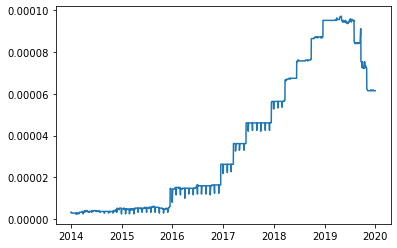

In [472]:
# Filling missing values in effr_data with ffill
effr_data = effr_data.ffill()
plt.plot(effr_data)
plt.show()

In the context of economics and finance, filling missing values with ffill (forward fill) makes sense when we expect that the missing values are not significant departures from the underlying trend of the data. In other words, if we believe that the missing values are simply due to missing data points, and not due to any major shocks or structural changes in the economy, then it is reasonable to assume that the missing values are similar to the preceding values and can be filled using ffill.

In the case of the EFFR rate, which is the interest rate at which banks lend and borrow funds overnight from each other, it is generally expected to remain relatively stable over short periods of time. Therefore, filling missing values with ffill is reasonable, assuming that missing values are due to missing data points and not significant shocks or structural changes in the financial system. ALSO, we only have first row as NaN as ffil needs the closing price of the working day before 2014-01-01 which is not present in the data

In [473]:
merged_data = pd.merge(spy, effr_data, how="left", left_index = True, right_index = True)

# Calculate excess return
merged_data['excess_return'] = merged_data['Close'].pct_change() - merged_data['effr_rate']

#we only have one missing values which is the first row as pct change needs the previous closing price which has
#already been eliminated using left join
merged_data['excess_return'].isna().sum() #value is 1

#so we remove the first row
merged_data.drop(index=merged_data.index[0], inplace=True)
merged_data

,Open,High,Low,Close,Adj Close,Volume,spdr_return,effr_rate,excess_return
Date,,,,,,,,,
2014-01-03,183.229996,183.600006,182.630005,182.889999,154.374924,81390600,-0.000164,0.000003,-0.000167
2014-01-06,183.490005,183.559998,182.080002,182.360001,153.927536,108028200,-0.002898,0.000003,-0.002901
2014-01-07,183.089996,183.789993,182.949997,183.479996,154.872940,86144200,0.006142,0.000003,0.006139
2014-01-08,183.449997,183.830002,182.889999,183.520004,154.906738,96582300,0.000218,0.000003,0.000215
2014-01-09,184.110001,184.130005,182.800003,183.639999,155.007980,90683400,0.000654,0.000003,0.000651
...,...,...,...,...,...,...,...,...,...
2019-12-23,321.589996,321.649994,321.059998,321.220001,305.051239,52990000,0.001528,0.000062,0.001466
2019-12-24,321.470001,321.519989,320.899994,321.230011,305.060669,20270000,0.000031,0.000062,-0.000030
2019-12-26,321.649994,322.950012,321.640015,322.940002,306.684570,30911200,0.005323,0.000062,0.005262


<br id="2.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">  2.1 SPDR Return Time Series <a>

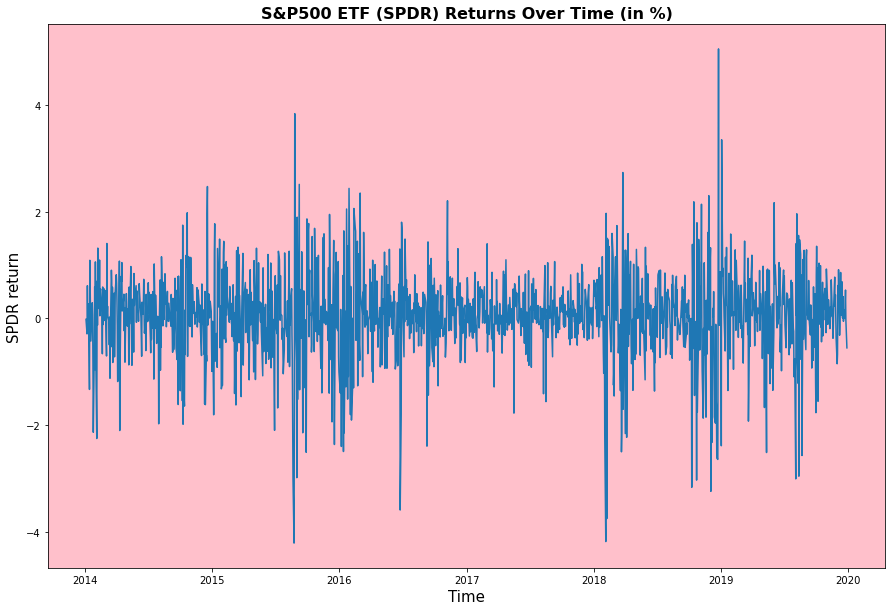

In [475]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["spdr_return"]*100)
ax.set_facecolor("pink")
ax.set_title('S&P500 ETF (SPDR) Returns Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("SPDR return",fontsize=15)

plt.show()

<br id="2.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.2 EFFR Time Series </a>

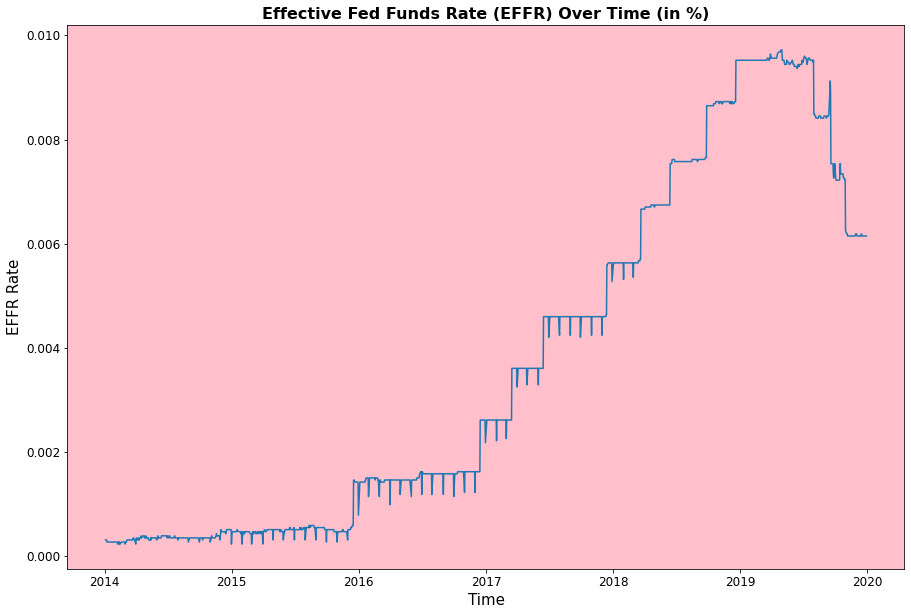

In [477]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["effr_rate"]*100)
ax.set_facecolor("pink")
ax.set_title('Effective Fed Funds Rate (EFFR) Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("EFFR Rate",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

<br id="2.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.3 Daily Excess Return Time Series</a>

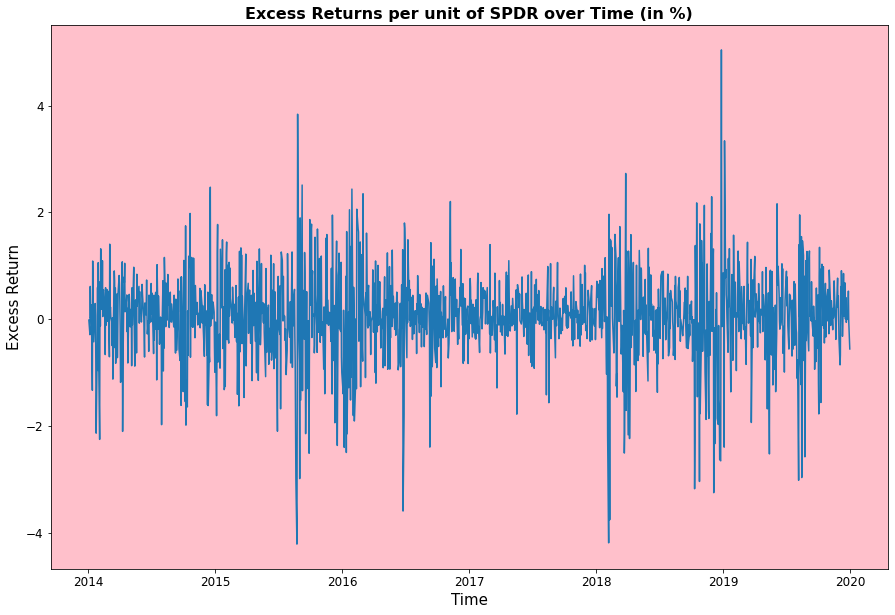

In [478]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["excess_return"]*100)
ax.set_facecolor("pink")
ax.set_title('Excess Returns per unit of SPDR over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Excess Return",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [10]:
i = 0
negative = [i for i in list(merged_data["excess_return"]) if i<0]
print(len(negative))

#So, almost half of the excess return values are negative, which is a realistic random scenario

687


## **RULES:** 

#### 1. spdr_return is the rate that we borrow at the end of trading period on day i and sell it at the end of trading period on day (i+1) 
#### 2. For each strategy, we apply the 60/40 portfolio rule which means investing 60% of the capital in stocks and 40% in the bond & money market.
#### 3. No stock investments are made within the first time_window period due to our calculation of MA(time_window). We don't invest without prior and clear knowledge about the behaviour of the price using moving averages metric, leading us to make this decision. So, the whole total of 200,000 will be taken as unused capital, increased by the risk-free rate for initial time_window period.
#### 4. total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i
#### 5. trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i
#### 6. cum_trad_PnL[i+1], cum_total_PnL[i+1] and cum_cash_growth[i+1] are calculated on i+1_th day when the trading PnL and cash growth has been calculated just when closing the position on day i+1 since investing on day i
#### 7. All other quantities apart from these represent the values after investment made based on closing price of day i

<br id="3">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 3. Mean Reversion Strategy  </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [421]:
price = merged_data["Close"]  # [0:1056] nearly 70% of the data
n = len(price)
riskfree = merged_data["effr_rate"]

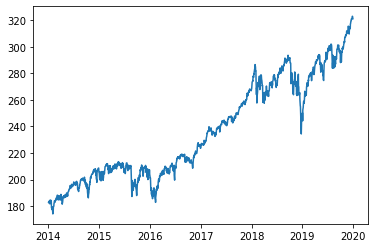

In [548]:
plt.plot(price)

In [422]:
unused_capital1 = np.zeros(np.shape(price))
daily_cash_growth1 = np.zeros(np.shape(price))
daily_trad_PnL1 = np.zeros(np.shape(price))
daily_total_PnL1 = np.zeros(np.shape(price))
total_capital1 = np.zeros(np.shape(price))
trading_capital1 = np.zeros(np.shape(price))
residual_capital1 = np.zeros(np.shape(price))
units1 = np.zeros(np.shape(price))
theta1 = np.zeros(np.shape(price))
position1 = np.zeros(np.shape(price))
cum_trad_PnL1 = np.zeros(np.shape(price)) 
cum_total_PnL1 = np.zeros(np.shape(price)) 
cum_cash_growth1 = np.zeros(np.shape(price))

#total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i

#trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i

#All other quantities apart from these three represent the values after investment made based on closing price of day i 

list_tradcapital = list()
list_totcapital = list()

stock_cash_split = 0.6 #60 - 40 portfolio strategy 
L = 5
total_capital1[0] = 200000

for time_window in range(10, 201, 10):
    MA1 = merged_data["Close"].rolling(window = time_window).mean()
    
    for i in range(n-1): 
        
        #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
        #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
        #over that period. 
        
        if i<time_window:        
            unused_capital1[i] = total_capital1[i]
            daily_cash_growth1[i] = unused_capital1[i] * riskfree[i]   
            daily_trad_PnL1[i] = 0
            daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
            total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 
            cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]
            cum_total_PnL1[i+1] = cum_total_PnL1[i] + daily_total_PnL1[i]
            
            #there's no cum_trad_PnL as we don't make trades for first time_window days

        if i>=time_window:

            if MA1[i] > price[i]:            
                position1[i] = 1

            elif MA1[i] < price[i]:
                position1[i] = -1

            trading_capital1[i] = stock_cash_split*total_capital1[i] # 60% of total available money is availed for stocks
            units1[i] = position1[i]*np.floor(trading_capital1[i]*L/price[i]) #long and short "whole" stocks

            #we now check with the given constraints 
            theta1[i]=units1[i]*price[i] 

            if(abs(theta1[i])<=trading_capital1[i]*L):     
                theta1[i]=units1[i]*price[i]
            else:
                theta1[i]=position1[i]*trading_capital1[i]*L

            #Calculating daily trading PnL
            daily_trad_PnL1[i] = merged_data["excess_return"][i+1]*theta1[i]
            cum_trad_PnL1[i+1] = cum_trad_PnL1[i] + daily_trad_PnL1[i] 

            #Calculating daily cash growth
            residual_capital1[i] = trading_capital1[i] - abs(theta1[i])/L
            unused_capital1[i] = (1-stock_cash_split)*total_capital1[i] + residual_capital1[i]
            daily_cash_growth1[i] = unused_capital1[i] * riskfree[i] 
            cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]

            #Calculating daily total PnL
            daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
            cum_total_PnL1[i] = cum_total_PnL1[i-1] + daily_total_PnL1[i]
            total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i]
    
    print(time_window, trading_capital1[n-2], total_capital1[n-1])
    list_tradcapital.append(trading_capital1[n-2])
    list_totcapital.append(total_capital1[n-1]) 


10 57070.91590227623 96709.81062649123
20 184884.0282172891 313300.62038966
30 130899.30042744117 221819.17961272263
40 146301.67877425207 247918.80989689092
50 249581.24066364553 422935.4174318748
60 405982.5136790381 687969.873769191
70 200520.4960885735 339797.60742071876
80 206062.92135915373 349189.99720006983
90 279210.59653123224 473145.02607516584
100 469416.8522754823 795463.8338894681
110 365719.314672404 619739.7820037274
120 258848.2140214329 438638.13464782404
130 173818.69553666303 294548.3725993539
140 299301.7296535913 507190.8279557545
150 259921.76537712544 440458.02701471414
160 261380.24951630554 442928.4929091546
170 238521.24658051907 404192.06785134494
180 193019.82411313406 327087.39582086453
190 140131.44670942368 237463.84813209448
200 93737.24914101035 158844.18779553592


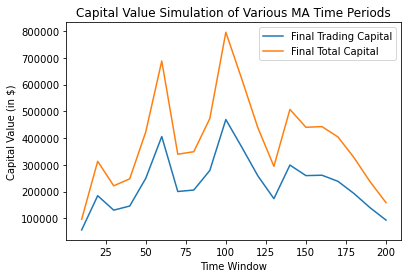

In [480]:
plt.plot(range(10,201,10), list_tradcapital)
plt.plot(range(10,201,10), list_totcapital)
plt.legend(["Final Trading Capital", "Final Total Capital"])
plt.title("Capital Value Simulation of Various MA Time Periods")
plt.xlabel("Time Window")
plt.ylabel("Capital Value (in $)")
plt.show()

On the basis of the optimisation plot, we believe that 60 days MA and 100 days MA could be our best options. But to select the one best, we need to calculate the technical indicators such as Sharpe Ratio, Sortino Ratio, etc.

<br id="3.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.1 Mean Reversion Strategy 1 with 60 days MA </a>

Someone else's code - but not sure

t1_unit_turnover[i] = t1_unit_turnover[i-1] + t1_position[i] #this is always buy strategy so no need for absolutes 
t1_theta[i] = t1_position[i]*spdr['Open'][i]
t1_dollar_turnover[i] = t1_dollar_turnover[i-1] + t1_theta[i]

In [424]:
time_window = 60
merged_data["MA_50"] = merged_data["Close"].rolling(window = time_window).mean()
MA1 = merged_data["MA_50"]

unused_capital1 = np.zeros(np.shape(price))
daily_cash_growth1 = np.zeros(np.shape(price))
daily_trad_PnL1 = np.zeros(np.shape(price))
daily_total_PnL1 = np.zeros(np.shape(price))
total_capital1 = np.zeros(np.shape(price))
trading_capital1 = np.zeros(np.shape(price))
residual_capital1 = np.zeros(np.shape(price))
units1 = np.zeros(np.shape(price))
theta1 = np.zeros(np.shape(price))
position1 = np.zeros(np.shape(price))
cum_trad_PnL1 = np.zeros(np.shape(price)) 
cum_total_PnL1 = np.zeros(np.shape(price)) 
cum_cash_growth1 = np.zeros(np.shape(price))
unit_turnover1 = np.zeros(np.shape(price))
dollar_turnover1 = np.zeros(np.shape(price))

stock_cash_split = 0.6 #60/40 portfolio rule 
L = 5
total_capital1[0] = 200000
    
for i in range(n-1): 

    #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
    #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
    #over that period. 

    if i<time_window:        
        unused_capital1[i] = total_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i]   
        daily_trad_PnL1[i] = 0
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]
        cum_total_PnL1[i+1] = cum_total_PnL1[i] + daily_total_PnL1[i]

        #there's no cum_trad_PnL as we don't make trades for first time_window days

    if i>=time_window:

        if MA1[i] > price[i]:            
            position1[i] = 1

        elif MA1[i] < price[i]:
            position1[i] = -1

        trading_capital1[i] = stock_cash_split*total_capital1[i] # 60% of total available money is availed for stocks
        units1[i] = position1[i]*np.floor(trading_capital1[i]*L/price[i]) #long and short whole stocks
        unit_turnover1[i] = abs(units1[i] - units1[i-1])
        print(units1[i],units1[i-1],unit_turnover1[i])

        #we now check with the given constraints 
        theta1[i]=units1[i]*price[i] 

        if(abs(theta1[i])<=trading_capital1[i]*L):     
            theta1[i]=units1[i]*price[i]
        else:
            theta1[i]=position1[i]*trading_capital1[i]*L
        
        dollar_turnover1[i] = abs(theta1[i] - theta1[i-1])
        print(theta1[i],theta1[i-1],dollar_turnover1[i])

        #Calculating daily trading PnL
        daily_trad_PnL1[i] = merged_data["excess_return"][i+1]*theta1[i]
        cum_trad_PnL1[i+1] = cum_trad_PnL1[i] + daily_trad_PnL1[i] 

        #Calculating daily cash growth
        residual_capital1[i] = trading_capital1[i] - abs(theta1[i])/L
        unused_capital1[i] = (1-stock_cash_split)*total_capital1[i] + residual_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]

        #Calculating daily total PnL
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        cum_total_PnL1[i] = cum_total_PnL1[i-1] + daily_total_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 


-3187.0 0.0 3187.0
-599952.75 0.0 599952.75
-3145.0 -3187.0 42.0
-594027.6153564453 -599952.75 5925.1346435546875
-3162.0 -3145.0 17.0
-596448.0754394531 -594027.6153564453 2420.4600830078125
-3313.0 -3162.0 151.0
-617543.1797790527 -596448.0754394531 21095.10433959961
-3461.0 -3313.0 148.0
-638000.7273254395 -617543.1797790527 20457.54754638672
-3404.0 -3461.0 57.0
-630080.4207763672 -638000.7273254395 7920.306549072266
-3259.0 -3404.0 145.0
-609726.2980651855 -630080.4207763672 20354.12271118164
3539.0 -3259.0 6798.0
648203.2529602051 -609726.2980651855 1257929.5510253906
3475.0 3539.0 64.0
630747.2309112549 648203.2529602051 17456.022048950195
3529.0 3475.0 54.0
645595.2686157227 630747.2309112549 14848.037704467773
-3577.0 3529.0 7106.0
-658883.3890838623 645595.2686157227 1304478.657699585
-3429.0 -3577.0 148.0
-638239.7867431641 -658883.3890838623 20643.602340698242
-3410.0 -3429.0 19.0
-635589.8979187012 -638239.7867431641 2649.8888244628906
-3363.0 -3410.0 47.0
-629015.49742126

-734885.72215271 -744095.0 9209.277847290039
3760.0 -3527.0 7287.0
770724.7839355469 -734885.72215271 1505610.5060882568
3742.0 3760.0 18.0
765239.0 770724.7839355469 5485.783935546875
-3836.0 3742.0 7578.0
-794435.6234130859 765239.0 1559674.623413086
3931.0 -3836.0 7767.0
809117.737197876 -794435.6234130859 1603553.360610962
-4035.0 3931.0 7966.0
-841620.3073883057 809117.737197876 1650738.0445861816
-4083.0 -4035.0 48.0
-849100.7074127197 -841620.3073883057 7480.4000244140625
-3889.0 -4083.0 194.0
-818478.9661102295 -849100.7074127197 30621.741302490234
-3960.0 -3889.0 71.0
-829620.0 -818478.9661102295 11141.033889770508
-3892.0 -3960.0 68.0
-818915.7342529297 -829620.0 10704.265747070312
-3922.0 -3892.0 30.0
-823620.0 -818915.7342529297 4704.2657470703125
-4011.0 -3922.0 89.0
-837577.0493774414 -823620.0 13957.049377441406
4250.0 -4011.0 8261.0
874479.9766540527 -837577.0493774414 1712057.0260314941
4229.0 4250.0 21.0
868086.8480682373 874479.9766540527 6393.12858581543
4249.0 4229

6814.0 6793.0 21.0
1305562.4415893555 1299500.9207305908 6061.520858764648
6549.0 6814.0 265.0
1230884.530014038 1305562.4415893555 74677.91157531738
6370.0 6549.0 179.0
1181125.3883361816 1230884.530014038 49759.141677856445
6371.0 6370.0 1.0
1181374.4833374023 1181125.3883361816 249.09500122070312
6359.0 6371.0 12.0
1178131.957168579 1181374.4833374023 3242.526168823242
6191.0 6359.0 168.0
1132086.2637786865 1178131.957168579 46045.69338989258
6441.0 6191.0 250.0
1202083.8614501953 1132086.2637786865 69997.59767150879
6655.0 6441.0 214.0
1262985.8918762207 1202083.8614501953 60902.03042602539
6869.0 6655.0 214.0
1324892.753540039 1262985.8918762207 61906.86166381836
6812.0 6869.0 57.0
1308517.055053711 1324892.753540039 16375.698486328125
6805.0 6812.0 7.0
1306560.0 1308517.055053711 1957.0550537109375
6999.0 6805.0 194.0
1363265.2114562988 1306560.0 56705.21145629883
6820.0 6999.0 179.0
1311622.4499511719 1363265.2114562988 51642.76150512695
6882.0 6820.0 62.0
1329602.3789978027 131

-6062.0 -6012.0 50.0
-1451121.5895996094 -1442098.4106445312 9023.178955078125
-6103.0 -6062.0 41.0
-1458494.913925171 -1451121.5895996094 7373.324325561523
-5970.0 -6103.0 133.0
-1434591.0182189941 -1458494.913925171 23903.895706176758
-5992.0 -5970.0 22.0
-1438559.3709716797 -1434591.0182189941 3968.352752685547
6426.0 -5992.0 12418.0
1515379.3670654297 -1438559.3709716797 2953938.7380371094
6477.0 6426.0 51.0
1533559.3176727295 1515379.3670654297 18179.950607299805
-6560.0 6477.0 13037.0
-1563313.583984375 1533559.3176727295 3096872.9016571045
-6428.0 -6560.0 132.0
-1539634.587463379 -1563313.583984375 23678.996520996094
-6372.0 -6428.0 56.0
-1529598.6194458008 -1539634.587463379 10035.968017578125
-6314.0 -6372.0 58.0
-1519211.5438537598 -1529598.6194458008 10387.075592041016
-6194.0 -6314.0 120.0
-1497461.4059753418 -1519211.5438537598 21750.13787841797
-6200.0 -6194.0 6.0
-1498602.0416259766 -1497461.4059753418 1140.6356506347656
-6223.0 -6200.0 23.0
-1502854.5 -1498602.041625976

-5643.0 5538.0 11181.0
-1520788.5 1478203.034362793 2998991.534362793
-5435.0 -5643.0 208.0
-1478428.6402893066 -1520788.5 42359.85971069336
-5370.0 -5435.0 65.0
-1465204.532775879 -1478428.6402893066 13224.107513427734
-5361.0 -5370.0 9.0
-1463445.838897705 -1465204.532775879 1758.6938781738281
-5511.0 -5361.0 150.0
-1494032.1336364746 -1463445.838897705 30586.29473876953
-5420.0 -5511.0 91.0
-1475540.7470703125 -1494032.1336364746 18491.38656616211
-5440.0 -5420.0 20.0
-1479734.453125 -1475540.7470703125 4193.7060546875
-5495.0 -5440.0 55.0
-1490958.2762145996 -1479734.453125 11223.82308959961
-5333.0 -5495.0 162.0
-1457882.183959961 -1490958.2762145996 33076.09225463867
-5393.0 -5333.0 60.0
-1470185.6510009766 -1457882.183959961 12303.467041015625
-5335.0 -5393.0 58.0
-1458375.521850586 -1470185.6510009766 11810.129150390625
-5380.0 -5335.0 45.0
-1467663.9343261719 -1458375.521850586 9288.412475585938
-5433.0 -5380.0 53.0
-1478590.9168395996 -1467663.9343261719 10926.982513427734
-5

-4889.0 -5107.0 218.0
-1356061.9061279297 -1401258.6849365234 45196.77880859375
-4856.0 -4889.0 33.0
-1349239.6296386719 -1356061.9061279297 6822.2764892578125
-4819.0 -4856.0 37.0
-1341657.807647705 -1349239.6296386719 7581.821990966797
-4889.0 -4819.0 70.0
-1356306.4456481934 -1341657.807647705 14648.638000488281
-4770.0 -4889.0 119.0
-1331497.8698730469 -1356306.4456481934 24808.575775146484
-4746.0 -4770.0 24.0
-1326601.8678588867 -1331497.8698730469 4896.002014160156
-4761.0 -4746.0 15.0
-1329842.5548706055 -1326601.8678588867 3240.68701171875
-4771.0 -4761.0 10.0
-1332063.258239746 -1329842.5548706055 2220.703369140625
-4808.0 -4771.0 37.0
-1339893.4047851562 -1332063.258239746 7830.146545410156
-4690.0 -4808.0 118.0
-1315169.8629760742 -1339893.4047851562 24723.54180908203
-4760.0 -4690.0 70.0
-1329943.9709472656 -1315169.8629760742 14774.107971191406
-4788.0 -4760.0 28.0
-1335947.707397461 -1329943.9709472656 6003.7364501953125
-4906.0 -4788.0 118.0
-1360580.9141235352 -1335947

-8219.0 -8354.0 135.0
-2478850.450164795 -2509290.9392089844 30440.489044189453
-8037.0 -8219.0 182.0
-2437622.00189209 -2478850.450164795 41228.44827270508
-8049.0 -8037.0 12.0
-2440537.221221924 -2437622.00189209 2915.2193298339844
-7952.0 -8049.0 97.0
-2418521.396484375 -2440537.221221924 22015.824737548828
-8039.0 -7952.0 87.0
-2438469.7620544434 -2418521.396484375 19948.36557006836
-7745.0 -8039.0 294.0
-2371054.4134521484 -2438469.7620544434 67415.34860229492
-7623.0 -7745.0 122.0
-2343081.4727783203 -2371054.4134521484 27972.940673828125
-7658.0 -7623.0 35.0
-2351235.7306518555 -2343081.4727783203 8154.257873535156
-7653.0 -7658.0 5.0
-2350236.346710205 -2351235.7306518555 999.3839416503906
-7547.0 -7653.0 106.0
-2325834.404724121 -2350236.346710205 24401.941986083984
-7475.0 -7547.0 72.0
-2309326.5182495117 -2325834.404724121 16507.886474609375
-7533.0 -7475.0 58.0
-2322800.595977783 -2309326.5182495117 13474.077728271484
-7472.0 -7533.0 61.0
-2308848.0 -2322800.595977783 13952

In [425]:
total_capital1[n-1]

687969.873769191

In [515]:
merged_data["Theta1"] = theta1
theta1 = merged_data["Theta1"][:-1]

merged_data["Trading Capital1"] = trading_capital1 
trading_capital1 = merged_data["Trading Capital1"][:-1]

merged_data["Daily_cash_growth1"] = daily_cash_growth1
daily_cash_growth1 = merged_data["Daily_cash_growth1"][:-1]

merged_data["Daily_trading_PnL1"] = daily_trad_PnL1
daily_trad_PnL1 = merged_data["Daily_trading_PnL1"][:-1]

merged_data["Daily_total_PnL1"] = daily_total_PnL1
daily_total_PnL1 = merged_data["Daily_total_PnL1"][:-1]

merged_data["Total_capital1"] = total_capital1
total_capital1 = merged_data["Total_capital1"][:-1]

merged_data["Stocks_Purchased1"] = units1
units1 = merged_data["Stocks_Purchased1"][:-1]

merged_data["Cumulative_cash_growth1"] = cum_cash_growth1
cum_cash_growth1 = merged_data["Cumulative_cash_growth1"][:-1]

merged_data["Cumulative_trading_PnL1"] = cum_trad_PnL1
cum_trad_PnL1 = merged_data["Cumulative_trading_PnL1"][:-1]

merged_data["Cumulative_total_PnL1"] = cum_total_PnL1
cum_total_PnL1 = merged_data["Cumulative_total_PnL1"][:-1]

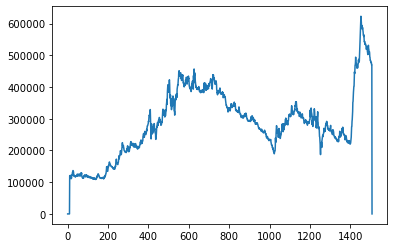

In [237]:
plt.plot(trading_capital1)

<br id="3.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.2 Mean Reversion Strategy 1 with 100 days MA</a>

In [426]:
time_window2 = 100
merged_data["MA_100"] = merged_data["Close"].rolling(window = time_window2).mean()
MA2 = merged_data["MA_100"]

#Price, riskfree, excess return, V0, leverage and stock_cash_split quantities will remain same 
#For the rest:
unused_capital2 = np.zeros(np.shape(price))
daily_cash_growth2 = np.zeros(np.shape(price))
daily_trad_PnL2 = np.zeros(np.shape(price))
daily_total_PnL2 = np.zeros(np.shape(price))
total_capital2 = np.zeros(np.shape(price))
trading_capital2 = np.zeros(np.shape(price))
residual_capital2 = np.zeros(np.shape(price))
units2 = np.zeros(np.shape(price))
theta2 = np.zeros(np.shape(price))
position2 = np.zeros(np.shape(price))
cum_trad_PnL2 = np.zeros(np.shape(price)) 
cum_total_PnL2 = np.zeros(np.shape(price)) 
cum_cash_growth2 = np.zeros(np.shape(price))
unit_turnover2 = np.zeros(np.shape(price))
dollar_turnover2 = np.zeros(np.shape(price))
 
stock_cash_split = 0.6 #60 - 40 portfolio rule
L = 5
total_capital2[0] = 200000

for i in range(n-1): 

    #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
    #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
    #over that period. 

    if i<time_window2:        
        unused_capital2[i] = total_capital2[i]
        daily_cash_growth2[i] = unused_capital2[i] * riskfree[i]   
        daily_trad_PnL2[i] = 0
        daily_total_PnL2[i] = daily_cash_growth2[i] + daily_trad_PnL2[i]
        total_capital2[i+1] = total_capital2[i] + daily_total_PnL2[i] 
        cum_cash_growth2[i+1] = cum_cash_growth2[i] + daily_cash_growth2[i]
        cum_total_PnL2[i+1] = cum_total_PnL2[i] + daily_total_PnL2[i]

        #there's no cum_trad_PnL as we don't make trades for first time_window days

    if i>=time_window2:

        if MA2[i] > price[i]:            
            position2[i] = 1

        elif MA2[i] < price[i]:
            position2[i] = -1

        trading_capital2[i] = stock_cash_split*total_capital2[i] # 60% of total available money is availed for stocks
        units2[i] = position2[i]*np.floor(trading_capital2[i]*L/price[i]) #long and short whole stocks
        unit_turnover2[i] = abs(units2[i] - units2[i-1])
        print(units2[i],units2[i-1],unit_turnover2[i])

        #we now check with the given constraints 
        theta2[i]=units2[i]*price[i] 

        if(abs(theta2[i])<=trading_capital2[i]*L):     
            theta2[i]=units2[i]*price[i]
        else:
            theta2[i]=position2[i]*trading_capital2[i]*L
        
        dollar_turnover2[i] = abs(theta2[i] - theta2[i-1])
        print(theta2[i],theta2[i-1],dollar_turnover2[i])

        #Calculating daily trading PnL
        daily_trad_PnL2[i] = merged_data["excess_return"][i+1]*theta2[i]
        cum_trad_PnL2[i+1] = cum_trad_PnL2[i] + daily_trad_PnL2[i] 

        #Calculating daily cash growth
        residual_capital2[i] = trading_capital2[i] - abs(theta2[i])/L
        unused_capital2[i] = (1-stock_cash_split)*total_capital2[i] + residual_capital2[i]
        daily_cash_growth2[i] = unused_capital2[i] * riskfree[i] 
        cum_cash_growth2[i+1] = cum_cash_growth2[i] + daily_cash_growth2[i]

        #Calculating daily total PnL
        daily_total_PnL2[i] = daily_cash_growth2[i] + daily_trad_PnL2[i]
        cum_total_PnL2[i] = cum_total_PnL2[i-1] + daily_total_PnL2[i]
        total_capital2[i+1] = total_capital2[i] + daily_total_PnL2[i]
        

-3119.0 0.0 3119.0
-600002.0147705078 0.0 600002.0147705078
-3099.0 -3119.0 20.0
-597115.2973022461 -600002.0147705078 2886.7174682617188
-3085.0 -3099.0 14.0
-595096.4811706543 -597115.2973022461 2018.8161315917969
-3092.0 -3085.0 7.0
-596137.6094360352 -595096.4811706543 1041.1282653808594
-3067.0 -3092.0 25.0
-592513.737487793 -596137.6094360352 3623.8719482421875
-2987.0 -3067.0 80.0
-580822.1408843994 -592513.737487793 11691.596603393555
-2931.0 -2987.0 56.0
-572658.7943115234 -580822.1408843994 8163.346572875977
-2919.0 -2931.0 12.0
-570898.0253448486 -572658.7943115234 1760.7689666748047
-2917.0 -2919.0 2.0
-570565.2178039551 -570898.0253448486 332.8075408935547
-2958.0 -2917.0 41.0
-576573.3545837402 -570565.2178039551 6008.136779785156
-3043.0 -2958.0 85.0
-588942.1995697021 -576573.3545837402 12368.844985961914
-3006.0 -3043.0 37.0
-583554.7946777344 -588942.1995697021 5387.404891967773
-2996.0 -3006.0 10.0
-582092.8198852539 -583554.7946777344 1461.9747924804688
-2963.0 -299

-4884.0 -4862.0 22.0
-1037654.6727905273 -1034147.3851623535 3507.287628173828
-5006.0 -4884.0 122.0
-1056966.83694458 -1037654.6727905273 19312.164154052734
-4965.0 -5006.0 41.0
-1050445.086364746 -1056966.83694458 6521.750579833984
-4985.0 -4965.0 20.0
-1053629.6030426025 -1050445.086364746 3184.5166778564453
-4932.0 -4985.0 53.0
-1045189.4309692383 -1053629.6030426025 8440.172073364258
-5101.0 -4932.0 169.0
-1071873.1549072266 -1045189.4309692383 26683.72393798828
-5136.0 -5101.0 35.0
-1077378.7419433594 -1071873.1549072266 5505.5870361328125
5263.0 -5136.0 10399.0
1097230.217514038 -1077378.7419433594 2174608.9594573975
5261.0 5263.0 2.0
1096655.4339447021 1097230.217514038 574.7835693359375
-5386.0 5261.0 10647.0
-1136176.6835632324 1096655.4339447021 2232832.1175079346
-5317.0 -5386.0 69.0
-1125236.735961914 -1136176.6835632324 10939.94760131836
-5481.0 -5317.0 164.0
-1151064.7798919678 -1125236.735961914 25828.04393005371
-5575.0 -5481.0 94.0
-1165788.25340271 -1151064.779891967

-10243.0 -10025.0 218.0
-2113438.208755493 -2079686.219406128 33751.989349365234
-9921.0 -10243.0 322.0
-2063270.3821105957 -2113438.208755493 50167.82664489746
-10270.0 -9921.0 349.0
-2117263.2376098633 -2063270.3821105957 53992.85549926758
-10501.0 -10270.0 231.0
-2152809.952316284 -2117263.2376098633 35546.7147064209
-10509.0 -10501.0 8.0
-2154029.742828369 -2152809.952316284 1219.790512084961
-10357.0 -10509.0 152.0
-2130642.0526428223 -2154029.742828369 23387.690185546875
-10323.0 -10357.0 34.0
-2125402.463699341 -2130642.0526428223 5239.588943481445
-9816.0 -10323.0 507.0
-2046145.1700439453 -2125402.463699341 79257.29365539551
-10188.0 -9816.0 372.0
-2103822.0 -2046145.1700439453 57676.82995605469
-10176.0 -10188.0 12.0
-2101954.53515625 -2103822.0 1867.46484375
-10535.0 -10176.0 359.0
-2157146.5421295166 -2101954.53515625 55192.0069732666
-10124.0 -10535.0 411.0
-2093440.7076416016 -2157146.5421295166 63705.83448791504
-10506.0 -10124.0 382.0
-2152154.164123535 -2093440.7076416

-1875913.7551879883 -1879458.2996826172 3544.5444946289062
-8011.0 -8236.0 225.0
-1837242.7106628418 -1875913.7551879883 38671.044525146484
-8070.0 -8011.0 59.0
-1847465.0408935547 -1837242.7106628418 10222.33023071289
-8069.0 -8070.0 1.0
-1847316.879699707 -1847465.0408935547 148.16119384765625
-8027.0 -8069.0 42.0
-1840109.524093628 -1847316.879699707 7207.355606079102
-7839.0 -8027.0 188.0
-1807673.447845459 -1840109.524093628 32436.076248168945
-7716.0 -7839.0 123.0
-1786331.117614746 -1807673.447845459 21342.33023071289
-7550.0 -7716.0 166.0
-1757413.53225708 -1786331.117614746 28917.585357666016
-7430.0 -7550.0 120.0
-1736390.9773254395 -1757413.53225708 21022.554931640625
-7277.0 -7430.0 153.0
-1709512.826675415 -1736390.9773254395 26878.150650024414
-7302.0 -7277.0 25.0
-1713925.4489135742 -1709512.826675415 4412.62223815918
-7257.0 -7302.0 45.0
-1706048.1034240723 -1713925.4489135742 7877.345489501953
-7085.0 -7257.0 172.0
-1675531.6889190674 -1706048.1034240723 30516.41450500

-5761.0 -5774.0 13.0
-1434949.890548706 -1437321.777709961 2371.887161254883
-5673.0 -5761.0 88.0
-1418533.667312622 -1434949.890548706 16416.223236083984
-5647.0 -5673.0 26.0
-1413726.4844665527 -1418533.667312622 4807.182846069336
-5568.0 -5647.0 79.0
-1398848.6162109375 -1413726.4844665527 14877.868255615234
-5473.0 -5568.0 95.0
-1380947.4000854492 -1398848.6162109375 17901.21612548828
-5427.0 -5473.0 46.0
-1372271.223312378 -1380947.4000854492 8676.176773071289
-5402.0 -5427.0 25.0
-1367570.3397827148 -1372271.223312378 4700.883529663086
-5276.0 -5402.0 126.0
-1343586.179321289 -1367570.3397827148 23984.16046142578
-5301.0 -5276.0 25.0
-1348415.344116211 -1343586.179321289 4829.164794921875
-5336.0 -5301.0 35.0
-1355077.1837158203 -1348415.344116211 6661.839599609375
-5281.0 -5336.0 55.0
-1344648.1942138672 -1355077.1837158203 10428.989501953125
-5249.0 -5281.0 32.0
-1338600.0024261475 -1344648.1942138672 6048.191787719727
-5281.0 -5249.0 32.0
-1344753.8367767334 -1338600.002426147

-5784.0 -5725.0 59.0
-1569372.6423339844 -1557257.3059082031 12115.33642578125
-5612.0 -5784.0 172.0
-1534152.4125976562 -1569372.6423339844 35220.229736328125
-5676.0 -5612.0 64.0
-1547334.2768554688 -1534152.4125976562 13181.8642578125
-5615.0 -5676.0 61.0
-1534916.3177490234 -1547334.2768554688 12417.959106445312
-5663.0 -5615.0 48.0
-1544866.330871582 -1534916.3177490234 9950.013122558594
-5718.0 -5663.0 55.0
-1556153.6651000977 -1544866.330871582 11287.334228515625
5986.0 -5718.0 11704.0
1610353.6542358398 -1556153.6651000977 3166507.3193359375
-6142.0 5986.0 12128.0
-1674370.5300292969 1610353.6542358398 3284724.1842651367
-6295.0 -6142.0 153.0
-1705567.3153686523 -1674370.5300292969 31196.78533935547
-6052.0 -6295.0 243.0
-1655827.2369384766 -1705567.3153686523 49740.07843017578
-5939.0 -6052.0 113.0
-1632631.0637512207 -1655827.2369384766 23196.17318725586
-5923.0 -5939.0 16.0
-1629417.336151123 -1632631.0637512207 3213.7276000976562
-5728.0 -5923.0 195.0
-1588947.1650390625 -1

1269928.7334594727 1261135.4295654297 8793.303894042969
4938.0 4866.0 72.0
1298496.4378051758 1269928.7334594727 28567.704345703125
5067.0 4938.0 129.0
1350152.7767028809 1298496.4378051758 51656.33889770508
4927.0 5067.0 140.0
1295111.1478271484 1350152.7767028809 55041.62887573242
4946.0 4927.0 19.0
1302825.878112793 1295111.1478271484 7714.730285644531
4950.0 4946.0 4.0
1304572.4395751953 1302825.878112793 1746.5614624023438
5032.0 4950.0 82.0
1337404.9538574219 1304572.4395751953 32832.51428222656
4954.0 5032.0 78.0
1306667.0883789062 1337404.9538574219 30737.865478515625
4939.0 4954.0 15.0
1300982.0080871582 1306667.0883789062 5685.080291748047
5092.0 4939.0 153.0
1362517.2916259766 1300982.0080871582 61535.28353881836
5180.0 5092.0 88.0
1398237.3620605469 1362517.2916259766 35720.07043457031
5183.0 5180.0 3.0
1399720.9673461914 1398237.3620605469 1483.6052856445312
-5254.0 5183.0 10437.0
-1428877.7951049805 1399720.9673461914 2828598.762451172
-5168.0 -5254.0 86.0
-1411380.831542

-8849.0 -8855.0 6.0
-2717527.9540100098 -2718750.639190674 1222.6851806640625
-8727.0 -8849.0 122.0
-2689486.796081543 -2717527.9540100098 28041.157928466797
-8643.0 -8727.0 84.0
-2670168.441101074 -2689486.796081543 19318.35498046875
-8711.0 -8643.0 68.0
-2686036.9031677246 -2670168.441101074 15868.46206665039
-8639.0 -8711.0 72.0
-2669451.0 -2686036.9031677246 16585.90316772461
-8630.0 -8639.0 9.0
-2667533.05267334 -2669451.0 1917.9473266601562
-8581.0 -8630.0 49.0
-2656248.445251465 -2667533.05267334 11284.607421875
-8337.0 -8581.0 244.0
-2599393.3012390137 -2656248.445251465 56855.14401245117
-8314.0 -8337.0 23.0
-2594134.188659668 -2599393.3012390137 5259.112579345703
-8325.0 -8314.0 11.0
-2596817.189025879 -2594134.188659668 2683.0003662109375
-8451.0 -8325.0 126.0
-2626317.177154541 -2596817.189025879 29499.98812866211
-8507.0 -8451.0 56.0
-2639466.7965393066 -2626317.177154541 13149.619384765625
-8434.0 -8507.0 73.0
-2622636.567932129 -2639466.7965393066 16830.228607177734
-817

In [558]:
total_capital2[n-2]

782361.4204591372

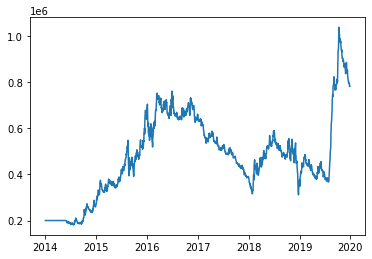

In [559]:
plt.plot(total_capital2)

In [518]:
merged_data["Theta2"] = theta2
theta2 = merged_data["Theta2"][:-1]

merged_data["Trading Capital2"] = trading_capital2 
trading_capital2 = merged_data["Trading Capital2"][:-1]

merged_data["Daily_cash_growth2"] = daily_cash_growth2
daily_cash_growth2 = merged_data["Daily_cash_growth2"][:-1]

merged_data["Daily_trading_PnL2"] = daily_trad_PnL2
daily_trad_PnL2 = merged_data["Daily_trading_PnL2"][:-1]

merged_data["Daily_total_PnL2"] = daily_total_PnL2
daily_total_PnL2 = merged_data["Daily_total_PnL2"][:-1]

merged_data["Total_capital2"] = total_capital2
total_capital2 = merged_data["Total_capital2"][:-1]

merged_data["Stocks_Purchased2"] = units2
units2 = merged_data["Stocks_Purchased2"][:-1]

merged_data["Cumulative_cash_growth2"] = cum_cash_growth2
cum_cash_growth2 = merged_data["Cumulative_cash_growth2"][:-1]

merged_data["Cumulative_trading_PnL2"] = cum_trad_PnL2
cum_trad_PnL2 = merged_data["Cumulative_trading_PnL2"][:-1]

merged_data["Cumulative_total_PnL2"] = cum_total_PnL2
cum_total_PnL2 = merged_data["Cumulative_total_PnL2"][:-1]

<br id="4">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 4. Model Comparison </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="4.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.1 Position of Strategies Plot</a>

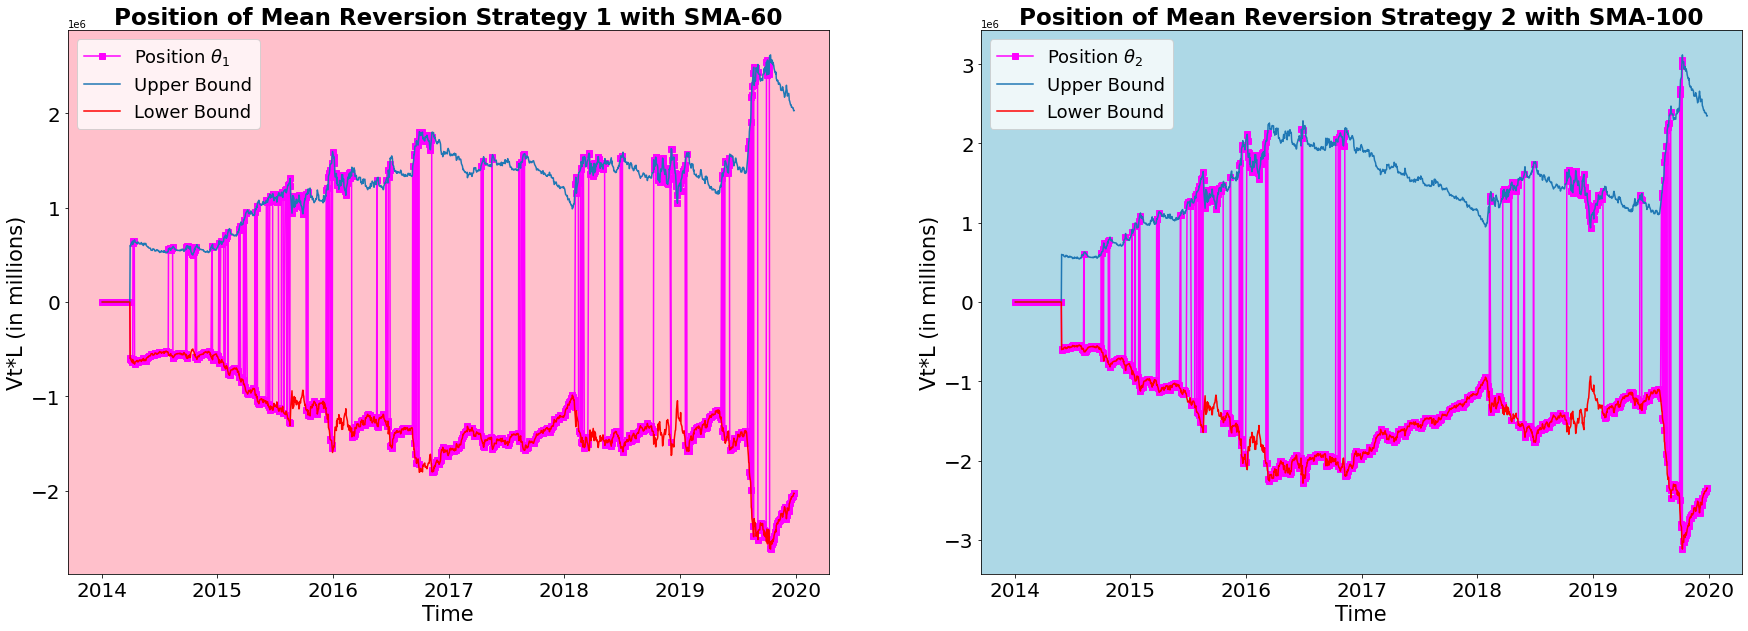

In [547]:
#Plot with upper and lower bounds 

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(theta1, marker="s", color="magenta")
ax[0].plot(trading_capital1*L)
ax[0].plot(-trading_capital1*L, color="red")  
ax[0].set_facecolor("pink")
ax[0].set_title('Position of Mean Reversion Strategy 1 with SMA-60',fontsize=23,weight='bold')
ax[0].legend(["Position $\\theta_1$","Upper Bound","Lower Bound"],fontsize=18)
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(theta2, marker="s", color="magenta")
ax[1].plot(trading_capital2*L)
ax[1].plot(-trading_capital2*L, color="red")  
ax[1].set_facecolor("lightblue")
ax[1].set_title('Position of Mean Reversion Strategy 2 with SMA-100',fontsize=23,weight='bold')
ax[1].legend(["Position $\\theta_2$","Upper Bound","Lower Bound"],fontsize=18)
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="4.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.2 Turnover Dollars and Turnover Units</a>

In [550]:
print(f"Turnover in Units for Reversion Strategy SMA-60: {sum(unit_turnover1)} ")
print(f"Turnover in Dollars for Reversion Strategy SMA-60: {sum(dollar_turnover1)} ")
print("")
print(f"Turnover in Units for Reversion Strategy SMA-100: {sum(unit_turnover2)} ")
print(f"Turnover in Dollars for Reversion Strategy SMA-100: {sum(dollar_turnover2)} ")
print("")

Turnover in Units for Reversion Strategy SMA-60: 1451099.0 
Turnover in Dollars for Reversion Strategy SMA-60: 340491438.6157837 

Turnover in Units for Reversion Strategy SMA-100: 1270257.0 
Turnover in Dollars for Reversion Strategy SMA-100: 292046259.85946655 



<br id="4.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.3 Daily Trading PnL Plot</a>

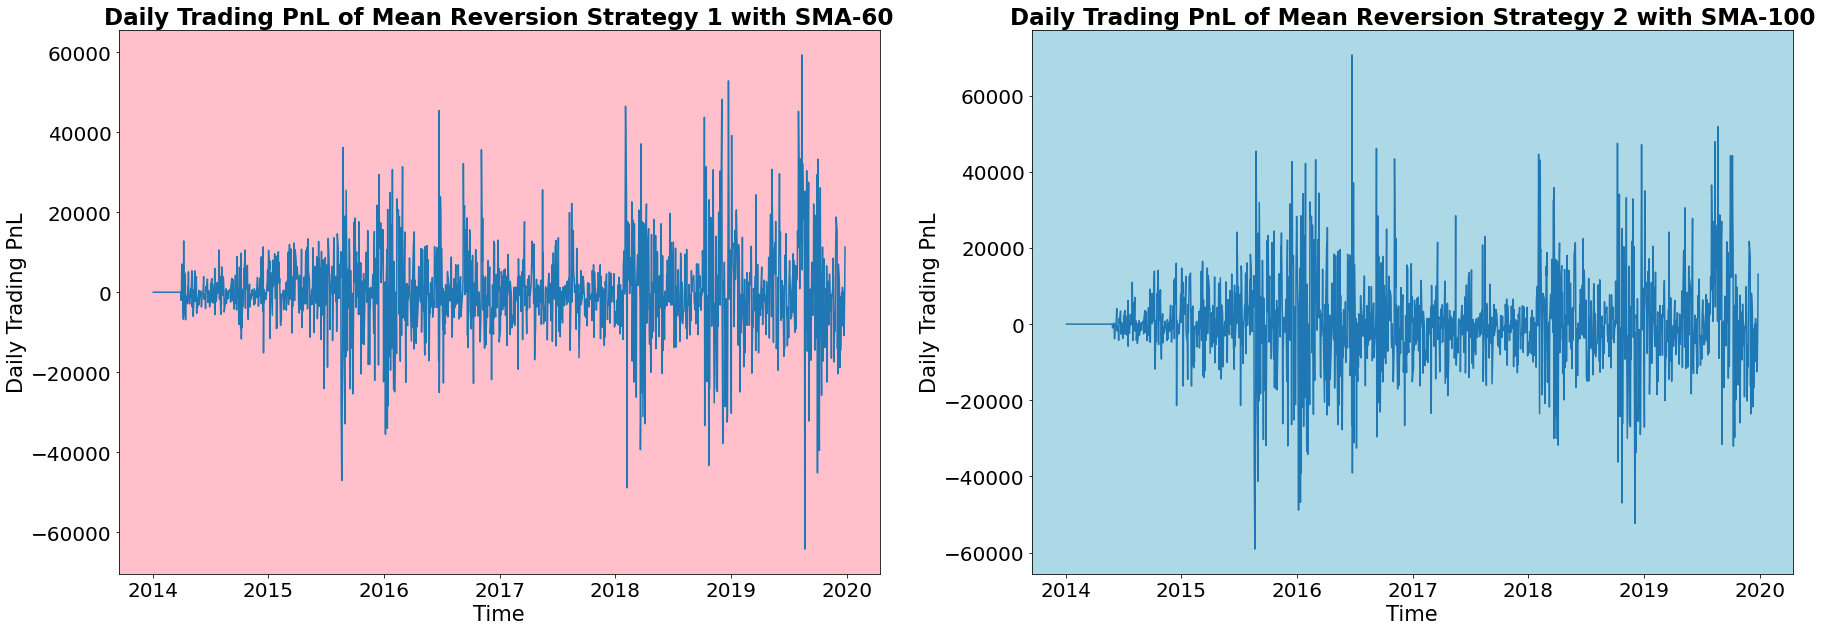

In [520]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_trad_PnL1)
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Trading PnL of Mean Reversion Strategy 1 with SMA-60',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Trading PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(daily_trad_PnL2)
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Trading PnL of Mean Reversion Strategy 2 with SMA-100',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Trading PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="4.4">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.4 Cumulative Trading PnL Plot</a>

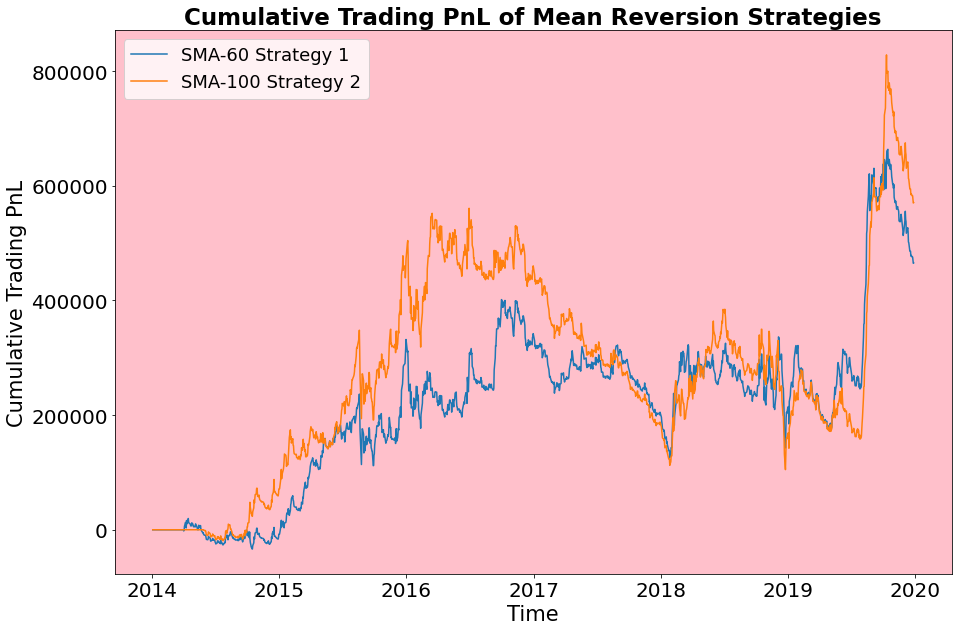

In [521]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_trad_PnL1)
ax.plot(cum_trad_PnL2)
ax.set_facecolor("pink")
ax.set_title('Cumulative Trading PnL of Mean Reversion Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Trading PnL",fontsize=21)
ax.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.5">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.5 Daily Cash Growth Plot</a>

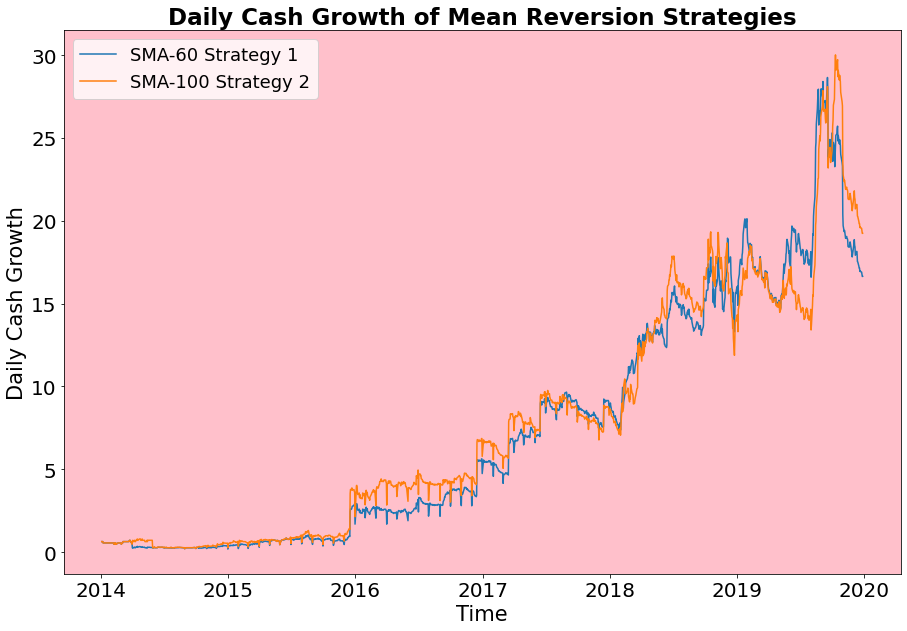

In [522]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(daily_cash_growth1[:n-1])
ax.plot(daily_cash_growth2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Daily Cash Growth of Mean Reversion Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Daily Cash Growth",fontsize=21)
ax.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.6">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.6 Cumulative Cash Growth Plot</a>

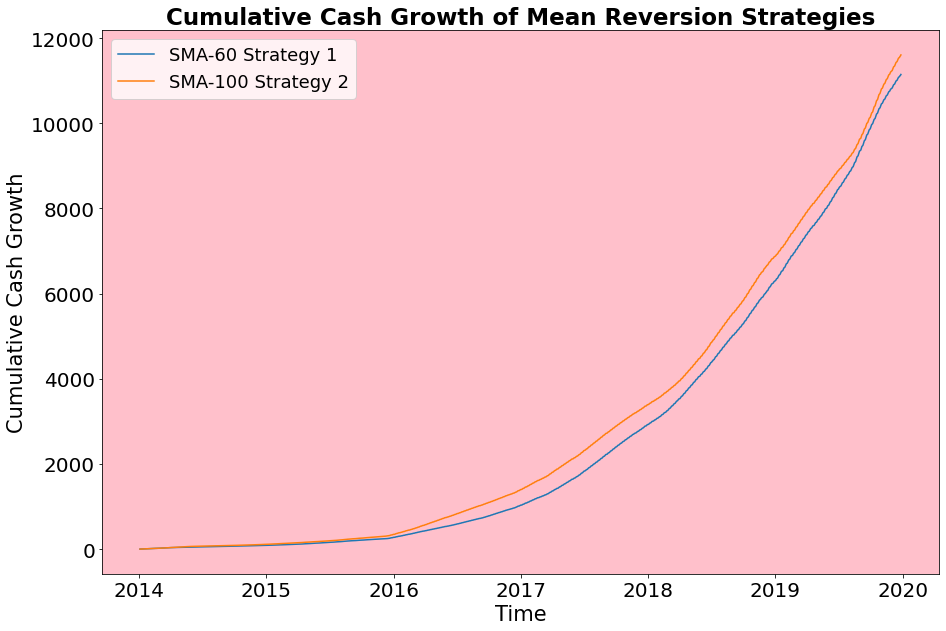

In [523]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_cash_growth1[:n-1])
ax.plot(cum_cash_growth2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Cumulative Cash Growth of Mean Reversion Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Cash Growth",fontsize=21)
ax.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.7">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.7 Daily Total PnL Plot</a>

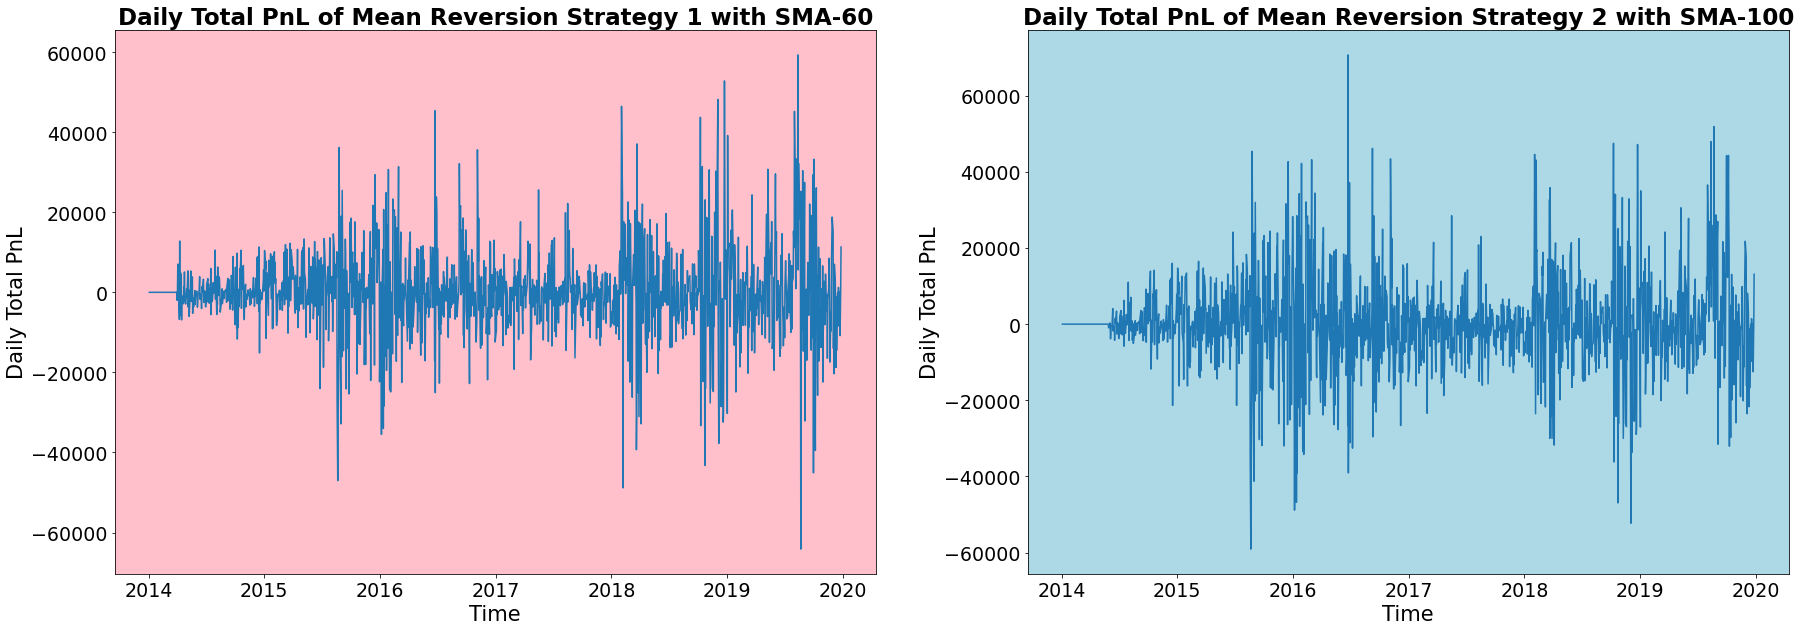

In [524]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_total_PnL1)
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Total PnL of Mean Reversion Strategy 1 with SMA-60',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Total PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=19)

ax[1].plot(daily_total_PnL2)
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Total PnL of Mean Reversion Strategy 2 with SMA-100',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Total PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=19)

<br id="4.8">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.8 Cumulative Total PnL Plot</a>

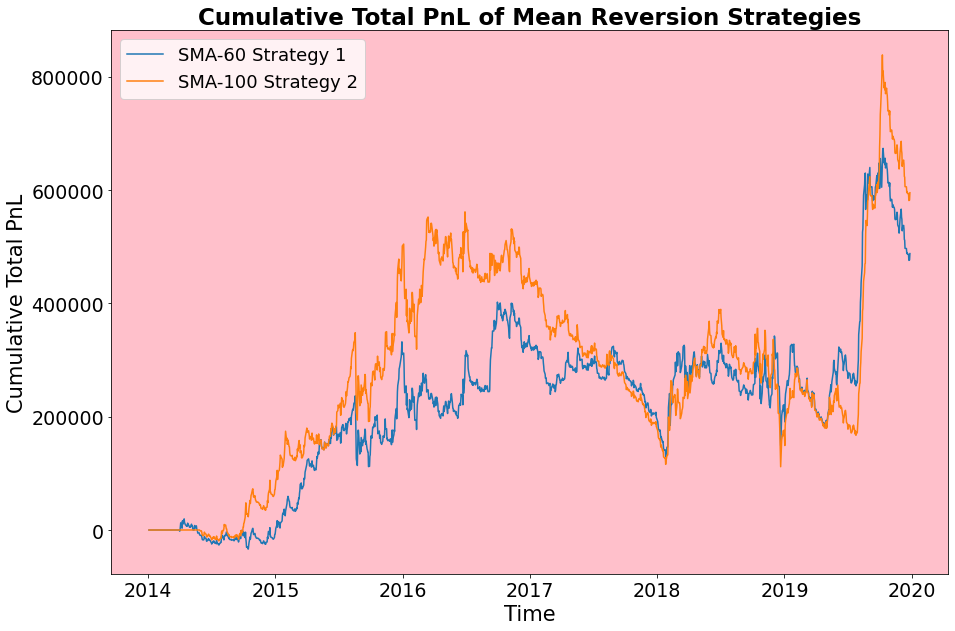

In [525]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_total_PnL1[:n-1])
ax.plot(cum_total_PnL2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Cumulative Total PnL of Mean Reversion Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Total PnL",fontsize=21)
ax.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=19)

plt.show()

- Sharpe Ratio
- Sortino Ratio
- Maximum Drawdown
- Calmar Ratio
- Plot Drawdown Chart and 90-day volatility of underlying asset p_t

#for all strategies collective
- Plot of 3 avg. excess returns with std. with spdr excess return with std.


<br id="4.9">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.9 Sharpe Ratio</a>

In [446]:
# As we don't have any trading PnL for the first 60 and 100 days because of no stock investment within that period for
# Mean reversion strategy 1 and 2 respectively, we think its better to caclulate mean and std dev for the period 
# after that

#the use of sqrt 252 to convert daily to annual Sharpe Ratio
sharpe_ratio1 = (daily_trad_PnL1[60:].mean()/daily_trad_PnL1[60:].std())*np.sqrt(252)
sharpe_ratio2 = (daily_trad_PnL2[100:].mean()/daily_trad_PnL2[100:].std())*np.sqrt(252)

print(f"The Sharpe Ratio for Mean Reversion SMA-60 Strategy is: {sharpe_ratio1}")
print(f"The Sharpe Ratio for Mean Reversion SMA-100 Strategy is: {sharpe_ratio2}")


The Sharpe Ratio for Mean Reversion SMA-60 Strategy is: 0.4757168230680063
The Sharpe Ratio for Mean Reversion SMA-100 Strategy is: 0.5254928307960449


<br id="4.10">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.10 Sortino Ratio</a>

In [448]:
daily_trad_PnL1_ = daily_trad_PnL1[60:]
neg_std1 = daily_trad_PnL1_[daily_trad_PnL1_<0].std()
sortino_ratio1 = (daily_trad_PnL1_.mean()/neg_std1)*np.sqrt(252)

daily_trad_PnL2_ = daily_trad_PnL2[100:]
neg_std2 = daily_trad_PnL2_[daily_trad_PnL2_<0].std()
sortino_ratio2 = (daily_trad_PnL2_.mean()/neg_std2)*np.sqrt(252)

print(f"The Sortino Ratio for Mean Reversion SMA-60 Strategy is: {sortino_ratio1}")
print(f"The Sortino Ratio for Mean Reversion SMA-100 Strategy is: {sortino_ratio2}")

The Sortino Ratio for Mean Reversion SMA-60 Strategy is: 0.6514493266687474
The Sortino Ratio for Mean Reversion SMA-100 Strategy is: 0.751975463125144


<br id="4.11">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.11 Maximum Drawdown</a>

In [562]:
cum_trad_PnL1_ = cum_trad_PnL1[60:]
max_drawdown1 = (cum_trad_PnL1_.min()-cum_trad_PnL1_.max())/cum_trad_PnL1_.max()

cum_trad_PnL2_ = cum_trad_PnL2[100:]
max_drawdown2 = (cum_trad_PnL2_.min()-cum_trad_PnL2_.max())/cum_trad_PnL2_.max()

print(max_drawdown1,max_drawdown2)

-1.0508373772112931 -1.0230674569207356


<br id="4.12">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.12 Calmar Ratio</a>

In [591]:
initial=200000

r1 = daily_trad_PnL1_[60:].mean()/initial 
val1 = initial*((1+r1)**(252))
val1
arr1 = (val1 - initial)/initial
calmar_ratio1_ = arr1/abs(max_drawdown1)
print(calmar_ratio1_)

r2 = daily_trad_PnL2_[100:].mean()/initial
val2 = initial*((1+r2)**(252))
val2
arr2 = (val2 - initial)/initial
calmar_ratio2_ = arr2/abs(max_drawdown2)
print(calmar_ratio2_)

0.537915841138206
0.6751991438366473


In [465]:
# calmar_ratio1 = (daily_trad_PnL1_.mean()/max_drawdown1)*np.sqrt(252)
calmar_ratio1_ = daily_trad_PnL1_.mean()/abs(max_drawdown1)
calmar_ratio2_ = daily_trad_PnL2_.mean()/abs(max_drawdown2)

# calmar_ratio2 = 
print(calmar_ratio1_,calmar_ratio2_)

#VERY QUESTIONABLE CALMAR RATIO VALUES

313.357119984064 405.30990890978217


In [576]:
# calmar_ratio1 = (daily_trad_PnL1_.mean()/max_drawdown1)*np.sqrt(252)
calmar_ratio1_ = daily_trad_PnL1_.mean()/abs(max_drawdown1)/100
calmar_ratio2_ = daily_trad_PnL2_.mean()/abs(max_drawdown2)/100

# calmar_ratio2 = 
print(calmar_ratio1_,calmar_ratio2_)

3.13357119984064 4.053099089097822


<br id="4.13">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.13 Drawdown Chart and 90-day stock volatility</a>

In [660]:
dd1 = np.zeros(np.shape(price))
dd2 = np.zeros(np.shape(price))

for i in range(n-1):
    dd1[i] = max(daily_trad_PnL1[:i+1]) - daily_trad_PnL1[i]
    dd2[i] = max(daily_trad_PnL2[:i+1]) - daily_trad_PnL2[i]

In [661]:
# Compute 90-day rolling 
rolling_vol = merged_data["Close"].rolling(window = 90).std()

In [662]:
merge = merged_data.copy()
merge["Rolling 90-day volatility"] = rolling_vol
merge["DD1"] = dd1
merge["DD2"] = dd2

In [663]:
merge["Rolling 90-day volatility"].isna().sum()

89

In [664]:
dataframe = merge[90:]
dataframe

,Open,High,Low,Close,Adj Close,Volume,spdr_return,effr_rate,excess_return,Theta1,...,Daily_trading_PnL2,Daily_total_PnL2,Total_capital2,Stocks_Purchased2,Cumulative_cash_growth2,Cumulative_trading_PnL2,Cumulative_total_PnL2,Rolling 90-day volatility,DD1,DD2
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,189.789993,189.880005,188.789993,189.059998,160.287247,72367000,-0.004738,0.000003,-0.004741,-6.078279e+05,...,0.000000,0.635098,200055.721959,0.0,55.721959,0.000000,55.721959,3.453346,7470.699182,0.000000
2014-05-15,188.679993,188.720001,186.479996,187.399994,158.879883,154956000,-0.008780,0.000004,-0.008784,-6.236672e+05,...,0.000000,0.714487,200056.357056,0.0,56.357056,0.000000,56.357056,3.455257,14970.784855,0.000000
2014-05-16,187.509995,188.130005,186.720001,188.050003,159.430939,97458000,0.003469,0.000004,0.003465,-6.173682e+05,...,0.000000,0.714490,200057.071543,0.0,57.071543,0.000000,57.071543,3.469319,15072.854898,0.000000
2014-05-19,187.690002,188.889999,187.520004,188.740005,160.015976,63839000,0.003669,0.000004,0.003666,-6.105739e+05,...,0.000000,0.714492,200057.786033,0.0,57.786033,0.000000,57.786033,3.490535,8957.943250,0.000000
2014-05-20,188.649994,188.669998,187.070007,187.550003,159.007111,111644000,-0.006305,0.000004,-0.006309,-6.221034e+05,...,0.000000,0.714495,200058.500525,0.0,58.500525,0.000000,58.500525,3.498996,18048.426045,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,321.589996,321.649994,321.059998,321.220001,305.051239,52990000,0.001528,0.000062,0.001466,-2.059984e+06,...,72.280039,91.819340,794040.464697,-7415.0,11545.865348,582494.599349,594131.569529,9.496059,59228.414117,70609.685903
2019-12-24,321.470001,321.519989,320.899994,321.230011,305.060669,20270000,0.000031,0.000062,-0.000030,-2.060369e+06,...,-12534.769856,-12515.229773,794132.284036,-7416.0,11565.404648,582566.879388,581616.339756,9.576103,70132.082977,83216.735798
2019-12-26,321.649994,322.950012,321.640015,322.940002,306.684570,30911200,0.005323,0.000062,0.005262,-2.027740e+06,...,725.132161,744.366196,781617.054263,-7260.0,11584.944731,570032.109533,582360.705952,9.730836,58663.777420,69956.833781


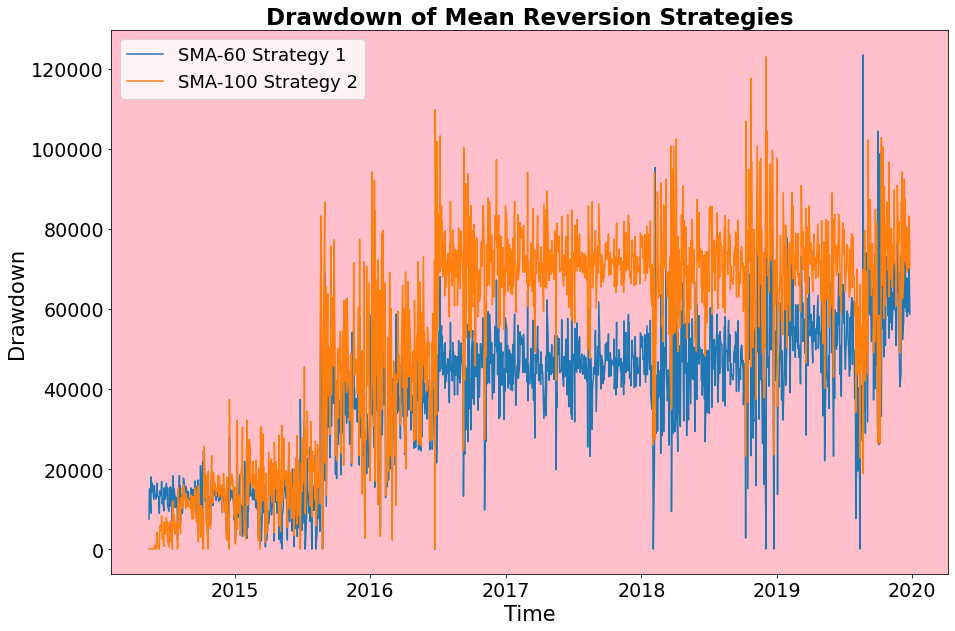

In [676]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(dataframe["DD1"][:-2]) #as we have daily_trad_PnL[n-2] as the last value in our strategies
ax.plot(dataframe["DD2"][:-2])
ax.set_facecolor("pink")
ax.set_title('Drawdown of Mean Reversion Strategies',fontsize=23,weight='bold')
ax.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Drawdown",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=19)

plt.show()

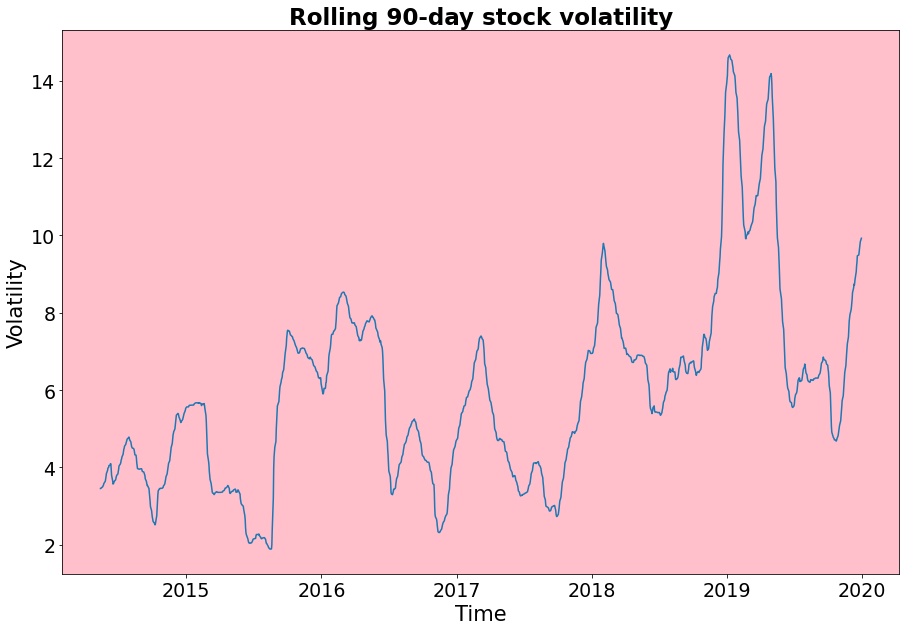

In [675]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(dataframe["Rolling 90-day volatility"])
ax.set_facecolor("pink")
ax.set_title('Rolling 90-day stock volatility',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Volatility",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=19)

plt.show()

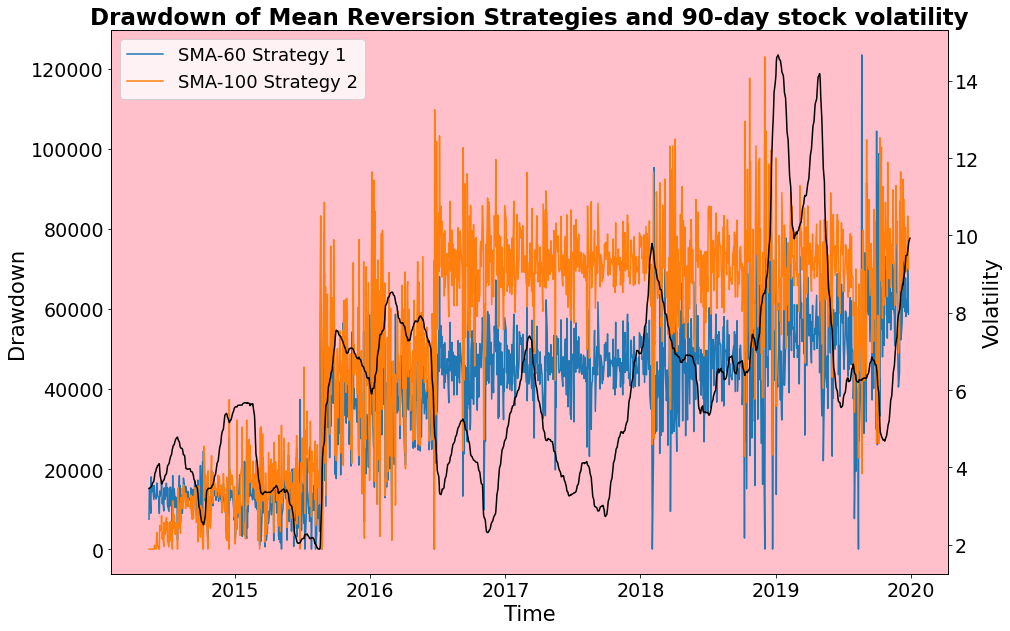

In [708]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.plot(dataframe["DD1"][:-2]) #as we have daily_trad_PnL[n-2] as the last value in our strategies
ax1.plot(dataframe["DD2"][:-2])
ax1.set_facecolor("pink")
ax1.set_title('Drawdown of Mean Reversion Strategies and 90-day stock volatility',fontsize=23,weight='bold')
ax1.legend(["SMA-60 Strategy 1","SMA-100 Strategy 2"], fontsize=18)
ax1.set_xlabel("Time",fontsize=21)
ax1.set_ylabel("Drawdown",fontsize=21)
ax1.tick_params(axis='both', which='major', labelsize=19)

ax2 = ax1.twinx() 
ax2.plot(dataframe["Rolling 90-day volatility"], color="black", label="90-day volatility")
ax2.set_facecolor("pink")
ax2.set_xlabel("Time",fontsize=21)
ax2.set_ylabel("Volatility",fontsize=21)
ax2.tick_params(axis='both', which='major', labelsize=19)

plt.show()


<br id="4.14">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.14 Plot of 3 avg. excess returns with std. with spdr excess return with std.</a>

In [681]:
print(f"The mean of the daily trading PnL of Mean Reversion Strategy 1: {(daily_trad_PnL1[60:]/trading_capital1[60:]).mean()}")
print(f"The std dev of the daily trading PnL of Mean Reversion Strategy 1: {(daily_trad_PnL1[60:]/trading_capital1[60:]).std()}")

print(f"The mean of the daily trading PnL of Mean Reversion Strategy 2: {(daily_trad_PnL2[100:]/trading_capital2[100:]).mean()}")
print(f"The std dev of the daily trading PnL of Mean Reversion Strategy 2: {(daily_trad_PnL2[100:]/trading_capital2[100:]).std()}")


The mean of the daily trading PnL of Mean Reversion Strategy 1: 0.0019150256585872879
The std dev of the daily trading PnL of Mean Reversion Strategy 1: 0.04161408064414081
The mean of the daily trading PnL of Mean Reversion Strategy 2: 0.0021302356750864913
The std dev of the daily trading PnL of Mean Reversion Strategy 2: 0.041804107206547064


From Strategy 2, we got: 

- The mean of the daily trading PnL of Crossover Strategy 1: 0.0009454269290110083
- The std dev of the daily trading PnL of Crossover Strategy 1: 0.04218805922189887
- The mean of the daily trading PnL of Crossover Strategy 2: 0.0008704788543653191
- The std dev of the daily trading PnL of Crossover Strategy 2: 0.04228722220847169

From Strategy 3, we got: 

- The mean of the daily trading PnL of Training Strategy: 0.0016636614547748975
- The std dev of the daily trading PnL of Training Strategy: 0.0397995591634479
- The mean of the daily trading PnL of Test Neural Network Strategy: 0.0021261366633541713
- The std dev of the daily trading PnL of Test Neural Network Strategy: 0.04577650197513602

In [691]:
m7 = merged_data["excess_return"].mean()
print(m7)
s7 = merged_data["excess_return"].std()
print(s7)

0.00037047529759823164
0.00828875778906967


In [683]:
m1 = (daily_trad_PnL1[60:]/trading_capital1[60:]).mean()
s1 = (daily_trad_PnL1[60:]/trading_capital1[60:]).std()

m2 = (daily_trad_PnL2[100:]/trading_capital2[100:]).mean()
s2 = (daily_trad_PnL2[100:]/trading_capital2[100:]).std()

m3 = 0.0009454269290110083
s3 = 0.04218805922189887

m4 = 0.0008704788543653191
s4 = 0.04228722220847169

m5 = 0.0016636614547748975
s5 = 0.0397995591634479

m6 = 0.0021261366633541713
s6 = 0.04577650197513602

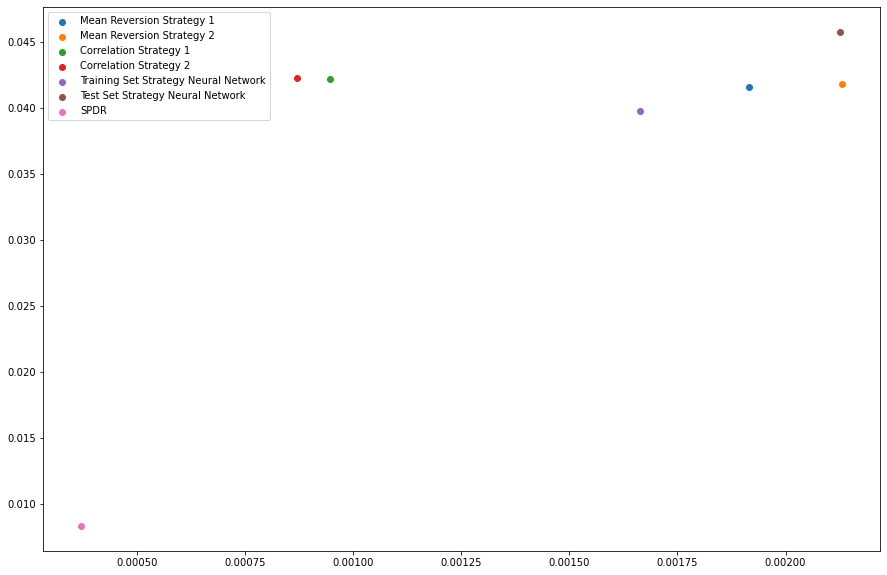

In [694]:
plt.subplots(figsize=(15,10))
plt.scatter(m1, s1, label="Mean Reversion Strategy 1")
plt.scatter(m2, s2, label="Mean Reversion Strategy 2")
plt.scatter(m3, s3, label="Correlation Strategy 1") #apologies, this is Crossover Strategy 1
plt.scatter(m4, s4, label="Correlation Strategy 2") #apologies, this is Crossover Strategy 2
plt.scatter(m5, s5, label="Training Set Strategy Neural Network")
plt.scatter(m6, s6, label="Test Set Strategy Neural Network")
plt.scatter(m7, s7, label="SPDR Excess Return")
plt.legend(["Mean Reversion Strategy 1","Mean Reversion Strategy 2", "Correlation Strategy 1", "Correlation Strategy 2", "Training Set Strategy Neural Network", "Test Set Strategy Neural Network", "SPDR"])
plt.show()